In [1]:
import os
import pickle
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# base directory for logs
logs_dir = '../embeddings/PBMC_CITEseq/'
logs = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(logs_dir):
    quality_path = os.path.join(logs_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue

    # loop through log files
    for file in tqdm(os.listdir(quality_path), desc=f"Processing {quality_dir}"):
        if not file.endswith('_log.pkl'):
            continue

        # extract method and fraction from filename
        method, frac, _ = file.split('_')
        frac = frac[4:]

        # load log
        log_path = os.path.join(quality_path, file)
        with open(log_path, 'rb') as f:
            log_data = pickle.load(f)

        if method == 'VAE':
            # save log data
            logs.append({
                'Quality': quality_dir.split('_')[0],
                'Replicate': quality_dir.split('_')[1],
                'Fraction': float(frac),
                'Method': method,
                'Loss curve': log_data['elbo_train'].values
            })

# convert to DataFrame and save
logs_df = pd.DataFrame(logs)


Processing Q1.000_rep0: 100%|██████████| 59/59 [00:00<00:00, 23358.88it/s]


<Figure size 432x288 with 0 Axes>

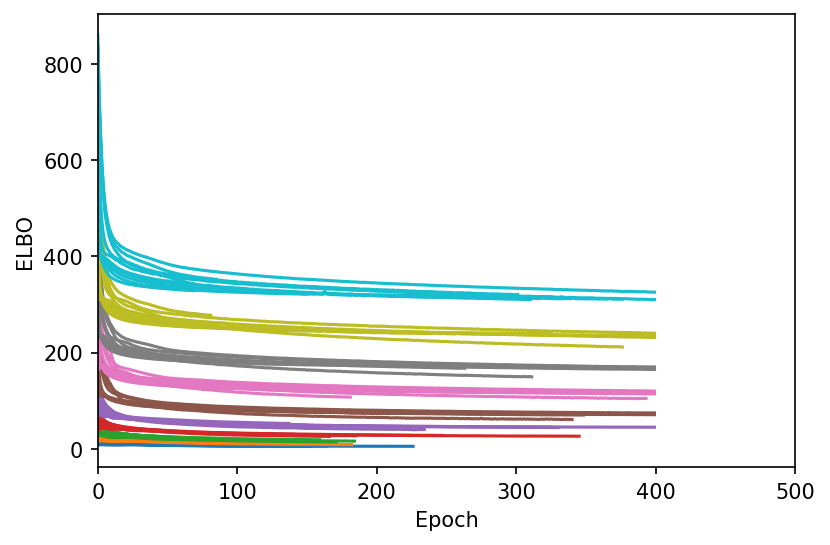

In [3]:
plt.clf()
fig = plt.figure(figsize=(6, 4), dpi=150)
qualities = logs_df['Quality'].unique()
colors = sns.color_palette('tab10', n_colors=len(qualities))
for row in logs_df.iterrows():
    plt.plot(row[1]['Loss curve'], 
             color=colors[qualities.tolist().index(row[1]['Quality'])],
             label=row[1]['Quality'])
plt.xlim(0, 500)
# plt.legend()
plt.xlabel('Epoch')
plt.ylabel('ELBO')
plt.show()

In [4]:
logs = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(logs_dir):
    quality_path = os.path.join(logs_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue

    # loop through log files
    for file in tqdm(os.listdir(quality_path), desc=f"Processing {quality_dir}"):
        if not file.endswith('_log.pkl'):
            continue

        # extract method and fraction from filename
        method, frac, _ = file.split('_')
        frac = frac[4:]

        # load log
        log_path = os.path.join(quality_path, file)
        with open(log_path, 'rb') as f:
            log_data = pickle.load(f)

        if method == 'nanoTxformer':
            # save log data
            print(log_data)
            logs.append({
                'Quality': quality_dir.split('_')[0],
                'Replicate': quality_dir.split('_')[1],
                'Fraction': float(frac),
                'Method': method,
                'Loss curve': log_data['train_losses']
            })

# convert to DataFrame and save
logs_df = pd.DataFrame(logs)

Processing Q0.001_rep0: 100%|██████████| 59/59 [00:00<00:00, 15421.20it/s]


{'train_losses': [6.081005096435547, 6.083250522613525, 6.082714319229126, 6.081005811691284, 6.0833680629730225, 6.08356785774231, 6.078090667724609, 6.078591585159302, 6.0789501667022705, 6.077255964279175, 6.080450057983398, 6.079303026199341, 6.076305389404297, 6.077086687088013, 6.079413890838623, 6.07587194442749, 6.076187610626221, 6.072445392608643, 6.073819637298584, 6.072067737579346, 6.076176166534424, 6.0752270221710205, 6.071813344955444, 6.070141792297363, 6.067073822021484, 6.0699462890625, 6.06732439994812, 6.065168857574463, 6.06700325012207, 6.0649309158325195, 6.063008546829224, 6.05636191368103, 6.061644792556763, 6.059570789337158, 6.0557990074157715, 6.0494890213012695, 6.051842927932739, 6.051871061325073, 6.054131746292114, 6.051121234893799, 6.044312477111816, 6.044839859008789, 6.042397737503052, 6.039523363113403, 6.038724899291992, 6.034182548522949, 6.038747549057007, 6.0329718589782715, 6.031649112701416, 6.028167486190796, 6.028383493423462, 6.02696132659

Processing Q0.002_rep0: 100%|██████████| 59/59 [00:00<00:00, 15975.72it/s]


{'train_losses': [6.027487277984619, 6.021012783050537, 6.0227439403533936, 6.024079322814941, 6.0270304679870605, 6.022559642791748, 6.0201780796051025, 6.019223213195801, 6.020292282104492, 6.019570350646973, 6.0176684856414795, 6.023250102996826, 6.018310070037842, 6.023486852645874, 6.021024227142334, 6.018642902374268, 6.011703252792358, 6.019504547119141, 6.014789581298828, 6.0152809619903564, 6.013028144836426, 6.014862060546875, 6.011930227279663, 6.011270999908447, 6.014447450637817, 6.012409925460815, 6.0071938037872314, 6.003219127655029, 6.004462480545044, 6.0092878341674805, 6.006082057952881, 6.002283096313477, 5.998372316360474, 6.002739429473877, 5.994300365447998, 5.991835355758667, 5.992862224578857, 5.9926698207855225, 5.989259481430054, 5.98799991607666, 5.990469455718994, 5.984652519226074, 5.985198974609375, 5.980567693710327, 5.984642267227173, 5.975856304168701, 5.973552465438843, 5.97385311126709, 5.973592519760132, 5.966550350189209, 5.962948322296143, 5.96739

Processing Q0.005_rep0: 100%|██████████| 59/59 [00:00<00:00, 16138.25it/s]


{'train_losses': [7.205302476882935, 7.20597767829895, 7.205367088317871, 7.209523677825928, 7.20333456993103, 7.2061076164245605, 7.202136516571045, 7.207980394363403, 7.207943677902222, 7.208740711212158, 7.208583116531372, 7.203263521194458, 7.2010204792022705, 7.209203481674194, 7.199744462966919, 7.198112726211548, 7.203871726989746, 7.202383756637573, 7.201719760894775, 7.198532342910767, 7.200965166091919, 7.196242809295654, 7.195759296417236, 7.195310354232788, 7.193395137786865, 7.196136474609375, 7.1938347816467285, 7.187486886978149, 7.190457582473755, 7.189501523971558, 7.185288429260254, 7.1893181800842285, 7.18366551399231, 7.185214996337891, 7.177891731262207, 7.17555046081543, 7.183234930038452, 7.176944971084595, 7.175305366516113, 7.175361633300781, 7.173707723617554, 7.173496246337891, 7.167766094207764, 7.167349576950073, 7.164114952087402, 7.163129568099976, 7.160271883010864, 7.160603284835815, 7.156535863876343, 7.15496039390564, 7.1530351638793945, 7.15423774719

Processing Q0.010_rep0: 100%|██████████| 59/59 [00:00<00:00, 17072.37it/s]


{'train_losses': [7.582749366760254, 7.583747148513794, 7.5860679149627686, 7.581720352172852, 7.580117225646973, 7.578599691390991, 7.578907489776611, 7.582223415374756, 7.585903167724609, 7.580036640167236, 7.5797929763793945, 7.575212478637695, 7.5769362449646, 7.5766613483428955, 7.577139854431152, 7.581109285354614, 7.574746370315552, 7.575452089309692, 7.57481837272644, 7.572638273239136, 7.5722174644470215, 7.572180271148682, 7.568258047103882, 7.5717363357543945, 7.571762800216675, 7.5674707889556885, 7.573540687561035, 7.564906120300293, 7.56645131111145, 7.559778928756714, 7.56337308883667, 7.561547517776489, 7.5587828159332275, 7.557204246520996, 7.558964967727661, 7.5550737380981445, 7.555616140365601, 7.555039167404175, 7.550612211227417, 7.545909404754639, 7.546787261962891, 7.549088716506958, 7.551044225692749, 7.542144060134888, 7.537360668182373, 7.538510084152222, 7.536062002182007, 7.537401437759399, 7.5333781242370605, 7.531182050704956, 7.527393817901611, 7.5317540

Processing Q0.022_rep0: 100%|██████████| 59/59 [00:00<00:00, 14622.07it/s]


{'train_losses': [7.3607177734375, 7.359100580215454, 7.356905937194824, 7.35819411277771, 7.36117959022522, 7.358871698379517, 7.362542152404785, 7.361193656921387, 7.3543078899383545, 7.353672504425049, 7.350647687911987, 7.355601787567139, 7.35833215713501, 7.353108167648315, 7.35305118560791, 7.358326435089111, 7.3545918464660645, 7.3468053340911865, 7.349717378616333, 7.34920072555542, 7.351462364196777, 7.347563028335571, 7.351813077926636, 7.346701145172119, 7.344962120056152, 7.347788572311401, 7.347659587860107, 7.343311786651611, 7.345325946807861, 7.338545083999634, 7.33943772315979, 7.336055755615234, 7.3266143798828125, 7.337667465209961, 7.335987329483032, 7.329913139343262, 7.329397439956665, 7.3320324420928955, 7.329355239868164, 7.322504997253418, 7.326881408691406, 7.32708215713501, 7.318427324295044, 7.322364330291748, 7.321036100387573, 7.315708160400391, 7.308023929595947, 7.3147923946380615, 7.306408405303955, 7.308602333068848, 7.302605628967285, 7.29911136627197

Processing Q0.046_rep0: 100%|██████████| 59/59 [00:00<00:00, 15748.99it/s]


{'train_losses': [7.041921377182007, 7.0462281703948975, 7.043646335601807, 7.038697957992554, 7.041857719421387, 7.040146589279175, 7.0400331020355225, 7.041150808334351, 7.039355278015137, 7.037564277648926, 7.039652585983276, 7.039501428604126, 7.041416168212891, 7.036716461181641, 7.03739333152771, 7.04125714302063, 7.037729740142822, 7.033053636550903, 7.037535190582275, 7.035473108291626, 7.032329320907593, 7.033594369888306, 7.032999277114868, 7.032384157180786, 7.032724618911743, 7.030801296234131, 7.02673602104187, 7.023757457733154, 7.026470184326172, 7.025100946426392, 7.024359464645386, 7.021716594696045, 7.018008470535278, 7.026215314865112, 7.016716003417969, 7.016624450683594, 7.016629695892334, 7.016676187515259, 7.012961387634277, 7.010600566864014, 7.010756492614746, 7.007609128952026, 7.00804328918457, 6.998259782791138, 7.004927635192871, 6.996628522872925, 6.993629217147827, 6.997780084609985, 6.995260000228882, 6.990651845932007, 6.990885019302368, 6.9903397560119

Processing Q0.100_rep0: 100%|██████████| 59/59 [00:00<00:00, 11495.51it/s]


{'train_losses': [7.989823341369629, 7.979869365692139, 7.971723318099976, 7.978158473968506, 7.97392201423645, 7.979552507400513, 7.968225002288818, 7.977008581161499, 7.981249570846558, 7.975707054138184, 7.986208915710449, 7.9775073528289795, 7.975997447967529, 7.983829498291016, 7.9818596839904785, 7.985710620880127, 7.980620861053467, 7.97658634185791, 7.969627857208252, 7.976621627807617, 7.963538646697998, 7.9703428745269775, 7.977375507354736, 7.9685680866241455, 7.96947169303894, 7.974609851837158, 7.963894844055176, 7.955145359039307, 7.9574220180511475, 7.967794179916382, 7.96343731880188, 7.950589179992676, 7.955540657043457, 7.9513208866119385, 7.954868793487549, 7.94266939163208, 7.95436429977417, 7.951665878295898, 7.947342872619629, 7.946818590164185, 7.945141792297363, 7.941279649734497, 7.941083669662476, 7.940362930297852, 7.9459075927734375, 7.938626289367676, 7.943791151046753, 7.934397459030151, 7.93825888633728, 7.93689751625061, 7.926909685134888, 7.916105985641

Processing Q0.215_rep0: 100%|██████████| 59/59 [00:00<00:00, 14142.41it/s]


{'train_losses': [6.496322870254517, 6.501321077346802, 6.503719806671143, 6.500092506408691, 6.499289512634277, 6.495264530181885, 6.500010251998901, 6.50483775138855, 6.5036780834198, 6.502696514129639, 6.4929468631744385, 6.498969793319702, 6.497859239578247, 6.500397205352783, 6.494877338409424, 6.497612476348877, 6.496368885040283, 6.487135648727417, 6.4997968673706055, 6.491854429244995, 6.494651794433594, 6.495331764221191, 6.492937326431274, 6.485941648483276, 6.489921808242798, 6.484515428543091, 6.483055591583252, 6.480625629425049, 6.482665300369263, 6.484770059585571, 6.487118482589722, 6.480804443359375, 6.474325895309448, 6.477471828460693, 6.471695899963379, 6.474060773849487, 6.472838401794434, 6.4782562255859375, 6.470751762390137, 6.46578049659729, 6.4659059047698975, 6.4649951457977295, 6.462762117385864, 6.462803840637207, 6.466009140014648, 6.461028099060059, 6.4588096141815186, 6.456422567367554, 6.450321435928345, 6.448234796524048, 6.453634977340698, 6.450832366

Processing Q0.464_rep0: 100%|██████████| 59/59 [00:00<00:00, 10865.12it/s]


{'train_losses': [5.91043758392334, 5.910583019256592, 5.91677713394165, 5.9188127517700195, 5.900115251541138, 5.9078569412231445, 5.907078981399536, 5.911209583282471, 5.9010796546936035, 5.904180526733398, 5.908228874206543, 5.908097743988037, 5.909794569015503, 5.908768653869629, 5.908607244491577, 5.898703336715698, 5.913086891174316, 5.894724369049072, 5.900791645050049, 5.9066243171691895, 5.896745204925537, 5.911456823348999, 5.901160001754761, 5.8947365283966064, 5.90074610710144, 5.90885853767395, 5.90419340133667, 5.8861494064331055, 5.898669242858887, 5.876206159591675, 5.882096767425537, 5.88096022605896, 5.895677328109741, 5.879300832748413, 5.890437602996826, 5.8821797370910645, 5.8728508949279785, 5.877856731414795, 5.876046895980835, 5.880349397659302, 5.876598596572876, 5.87249755859375, 5.892109394073486, 5.861011505126953, 5.8621721267700195, 5.865672826766968, 5.865937232971191, 5.873273849487305, 5.860029458999634, 5.878490447998047, 5.8641369342803955, 5.87132811

Processing Q1.000_rep0: 100%|██████████| 59/59 [00:00<00:00, 13362.71it/s]

{'train_losses': [6.128247499465942, 6.134054899215698, 6.126105785369873, 6.134725332260132, 6.132171392440796, 6.129913091659546, 6.142991304397583, 6.1310813426971436, 6.120971441268921, 6.13700532913208, 6.121778964996338, 6.12044882774353, 6.121503114700317, 6.118578910827637, 6.131147146224976, 6.139879465103149, 6.115424394607544, 6.138361930847168, 6.138294696807861, 6.125458478927612, 6.124136924743652, 6.115878343582153, 6.1279296875, 6.116268157958984, 6.125899791717529, 6.128607273101807, 6.11550235748291, 6.111780881881714, 6.111050605773926, 6.118389844894409, 6.111451864242554, 6.121200323104858, 6.114304542541504, 6.104001998901367, 6.101144790649414, 6.097485542297363, 6.105205059051514, 6.105670213699341, 6.102689266204834, 6.112796068191528, 6.093664646148682, 6.091653108596802, 6.0884013175964355, 6.102066278457642, 6.094577312469482, 6.087521314620972, 6.092145681381226, 6.087686538696289, 6.08047890663147, 6.08806848526001, 6.077466726303101, 6.078068494796753, 6.

<Figure size 432x288 with 0 Axes>

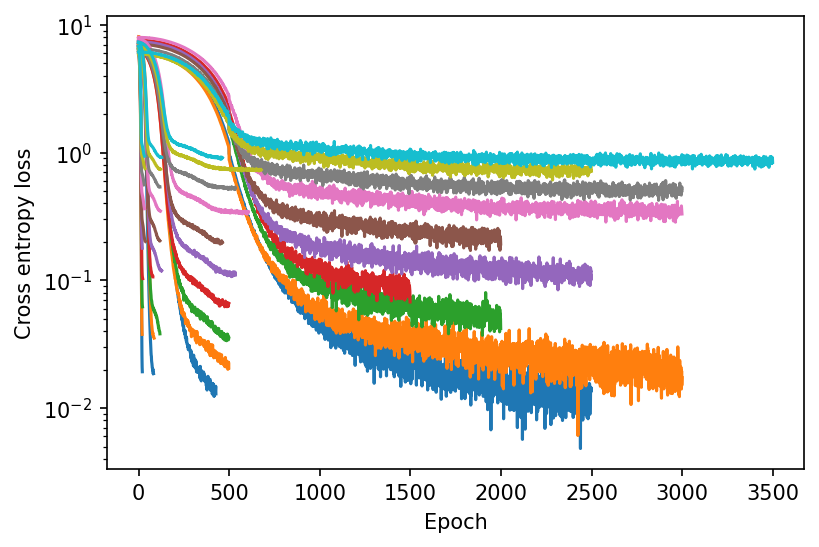

In [5]:
plt.clf()
fig = plt.figure(figsize=(6, 4), dpi=150)
qualities = logs_df['Quality'].unique()
colors = sns.color_palette('tab10', n_colors=len(qualities))
for row in logs_df.iterrows():
    plt.plot(row[1]['Loss curve'], 
             color=colors[qualities.tolist().index(row[1]['Quality'])],
             label=row[1]['Quality'])
# plt.legend()
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Cross entropy loss')
plt.show()

In [6]:
logs = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(logs_dir):
    quality_path = os.path.join(logs_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue

    # loop through log files
    for file in tqdm(os.listdir(quality_path), desc=f"Processing {quality_dir}"):
        if not file.endswith('_log.pkl'):
            continue

        # extract method and fraction from filename
        method, frac, _ = file.split('_')
        frac = frac[4:]

        # load log
        log_path = os.path.join(quality_path, file)
        with open(log_path, 'rb') as f:
            log_data = pickle.load(f)

        if method == 'PCA':
            # save log data
            print(log_data)
            logs.append({
                'Quality': quality_dir.split('_')[0],
                'Replicate': quality_dir.split('_')[1],
                'Fraction': float(frac),
                'Method': method,
                'Variance explained': log_data['variance_explained']
            })

# convert to DataFrame and save
logs_df = pd.DataFrame(logs)

Processing Q0.001_rep0: 100%|██████████| 59/59 [00:00<00:00, 17152.83it/s]


{'variance_explained': 0.8154659850383206}
{'variance_explained': 0.7965857469261128}
{'variance_explained': 0.7921159190387806}
{'variance_explained': 0.7477346473129364}
{'variance_explained': 0.7636805438652647}
{'variance_explained': 0.7455588860143534}
{'variance_explained': 0.7465987370802395}
{'variance_explained': 0.750270670106125}
{'variance_explained': 0.7517453522592558}
{'variance_explained': 0.7504471610076724}


Processing Q0.002_rep0: 100%|██████████| 59/59 [00:00<00:00, 17450.39it/s]


{'variance_explained': 0.7616186630560785}
{'variance_explained': 0.6399244016614074}
{'variance_explained': 0.5914573818785875}
{'variance_explained': 0.5763995080678892}
{'variance_explained': 0.5752546174197948}
{'variance_explained': 0.5704766361027379}
{'variance_explained': 0.5638572352104643}
{'variance_explained': 0.5615687821198811}
{'variance_explained': 0.5619607658504149}
{'variance_explained': 0.5608630646493142}


Processing Q0.005_rep0: 100%|██████████| 59/59 [00:00<00:00, 17401.30it/s]


{'variance_explained': 0.6846275746593127}
{'variance_explained': 0.613177215225567}
{'variance_explained': 0.5868199214385816}
{'variance_explained': 0.5741732786799816}
{'variance_explained': 0.5655557720635546}
{'variance_explained': 0.5668798433002815}
{'variance_explained': 0.5653750894592793}
{'variance_explained': 0.5627847479288104}
{'variance_explained': 0.5624737352902516}
{'variance_explained': 0.5616156091626009}


Processing Q0.010_rep0: 100%|██████████| 59/59 [00:00<00:00, 17381.75it/s]


{'variance_explained': 0.6670575511151704}
{'variance_explained': 0.5860008570758829}
{'variance_explained': 0.5422075178238356}
{'variance_explained': 0.5340711974920251}
{'variance_explained': 0.5204651901713644}
{'variance_explained': 0.5138176475824117}
{'variance_explained': 0.5105006466729949}
{'variance_explained': 0.5100637346138843}
{'variance_explained': 0.5104180142099578}
{'variance_explained': 0.5101960227239465}


Processing Q0.022_rep0: 100%|██████████| 59/59 [00:00<00:00, 15861.04it/s]


{'variance_explained': 0.6047969070977283}
{'variance_explained': 0.5348774505364667}
{'variance_explained': 0.4998113131774993}
{'variance_explained': 0.4768276582171031}
{'variance_explained': 0.46925079093339284}
{'variance_explained': 0.46743335074218884}
{'variance_explained': 0.4660232424001506}
{'variance_explained': 0.46758321988727053}
{'variance_explained': 0.4667656628326332}
{'variance_explained': 0.46615961142502743}


Processing Q0.046_rep0: 100%|██████████| 59/59 [00:00<00:00, 15991.21it/s]


{'variance_explained': 0.574827024040658}
{'variance_explained': 0.49706810569238236}
{'variance_explained': 0.47475120515817976}
{'variance_explained': 0.46094506625723125}
{'variance_explained': 0.4478156859581196}
{'variance_explained': 0.4430755070959453}
{'variance_explained': 0.44218592637110987}
{'variance_explained': 0.4425443202068755}
{'variance_explained': 0.44244767745069996}
{'variance_explained': 0.44207416093428586}


Processing Q0.100_rep0: 100%|██████████| 59/59 [00:00<00:00, 16193.16it/s]


{'variance_explained': 0.5885366551533776}
{'variance_explained': 0.5204475035981427}
{'variance_explained': 0.489085466570212}
{'variance_explained': 0.46942973966362955}
{'variance_explained': 0.4641955121176702}
{'variance_explained': 0.4608628405682315}
{'variance_explained': 0.4624915933747789}
{'variance_explained': 0.4614693606333855}
{'variance_explained': 0.4607418629365091}
{'variance_explained': 0.46107410708435415}


Processing Q0.215_rep0: 100%|██████████| 59/59 [00:00<00:00, 14998.72it/s]


{'variance_explained': 0.6267883498051776}
{'variance_explained': 0.5690831790946788}
{'variance_explained': 0.5441640158948768}
{'variance_explained': 0.5317872390064995}
{'variance_explained': 0.5181010968051007}
{'variance_explained': 0.5134559388543747}
{'variance_explained': 0.5146221521307262}
{'variance_explained': 0.5144564156285378}
{'variance_explained': 0.5137771727178453}
{'variance_explained': 0.513837567626248}


Processing Q0.464_rep0: 100%|██████████| 59/59 [00:00<00:00, 13521.88it/s]


{'variance_explained': 0.6826061111213025}
{'variance_explained': 0.6283388218737692}
{'variance_explained': 0.616469125557251}
{'variance_explained': 0.6050784073938092}
{'variance_explained': 0.5932650962180702}
{'variance_explained': 0.5889505252969813}
{'variance_explained': 0.5885381586511498}
{'variance_explained': 0.5913826524945178}
{'variance_explained': 0.5909883624282543}
{'variance_explained': 0.5908213957096832}


Processing Q1.000_rep0: 100%|██████████| 59/59 [00:00<00:00, 16324.56it/s]

{'variance_explained': 0.7377960363744012}
{'variance_explained': 0.7115465613845342}
{'variance_explained': 0.6942173731299937}
{'variance_explained': 0.6734374818588085}
{'variance_explained': 0.6699544115259412}
{'variance_explained': 0.6687149122835626}
{'variance_explained': 0.6699450807458731}
{'variance_explained': 0.6698128848725301}
{'variance_explained': 0.6701148319156882}
{'variance_explained': 0.6698388681957801}


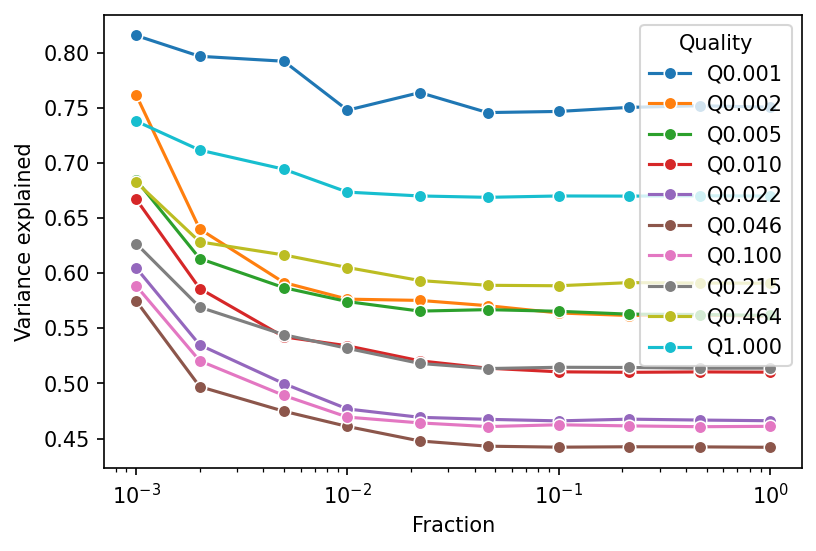

In [7]:
plt.figure(figsize=(6, 4), dpi=150)
sns.lineplot(logs_df, x='Fraction', y='Variance explained', 
             hue='Quality', marker='o')
plt.xscale('log')